# Exploration of the box-office revenue of movies

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os
from IPython.display import display
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [170]:
# Data source: http://www.cs.cmu.edu/~ark/personas/

# Define the data path
CLEAN_DATA_PATH = 'clean_data/'

In [171]:
# Load the data
movies_df = pd.read_csv(CLEAN_DATA_PATH + 'movies.csv')
display(movies_df.head())

,wiki_id,id,name,release_date,revenue,runtime
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0


### Release year

In [195]:
#to move higher: Look at release year to simplify and allow year by year analysis
def map_to_year(date):
    if type(date) == float and np.isnan(date):
        return "NA"
    elif len(str(date))==3:
        return str(date)
    else:
        return str(date[0:4])
    
movies_df["release_year"] = movies_df["release_date"].apply(lambda x: map_to_year(x))
print("Number of movies: ", len(movies_df))
print("number of movies without a release_year:", sum(movies_df["release_year"] == "NA"))
display(movies_df.head())

movies_df = movies_df[movies_df["release_year"] != "NA"]
print("Number of movies after removing those without release date: ", len(movies_df))

Number of movies:  81741
number of movies without a release_year: 6902


,wiki_id,id,name,release_date,revenue,runtime,release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,1983


Number of movies after removing those without release date:  74839


### Region of interest

In [196]:
# Load the ID of the movies belonging to each region of interest
asia_id = pd.read_csv(CLEAN_DATA_PATH + 'asia_movies.csv')
europe_id = pd.read_csv(CLEAN_DATA_PATH + 'europe_movies.csv')
india_id = pd.read_csv(CLEAN_DATA_PATH + 'india_movies.csv')
northen_america_id = pd.read_csv(CLEAN_DATA_PATH + 'northen_america_movies.csv')

In [197]:
#Create a df for each region containing the information from all movies od this region
def assign_region(movies_df, region_id_df):
    region_movies_df = pd.merge(region_id_df, movies_df, left_on="movie_id", right_on="id")
    region_movies_df = region_movies_df.drop(columns=["id"])
    return region_movies_df

asia_movies_df = assign_region(movies_df, asia_id) 
europe_movies_df = assign_region(movies_df, europe_id) 
india_movies_df = assign_region(movies_df, india_id) 
northen_america_movies_df = assign_region(movies_df, northen_america_id) 

display(asia_movies_df.head())
display(europe_movies_df.head())
display(india_movies_df.head())
display(northen_america_movies_df.head())

,movie_id,wiki_id,name,release_date,revenue,runtime,release_year
0,/m/07kjkz6,24229100,Lady Snowblood 2: Love Song of Vengeance,1974,NaN,89.0,1974
1,/m/0f400r,26878691,Mysterious Island,1982,NaN,100.0,1982
2,/m/03c0d85,13281430,My Name is Fame,2006,NaN,94.0,2006
3,/m/07k8x7p,24196090,The World of Geisha,1973-11-03,NaN,73.0,1973
4,/m/0479c20,17780234,Banana Club,1996-04-13,NaN,NaN,1996


,movie_id,wiki_id,name,release_date,revenue,runtime,release_year
0,/m/0285_cd,9363483,White Of The Eye,1987,NaN,110.0,1987
1,/m/01mrr1,261236,A Woman in Flames,1983,NaN,106.0,1983
2,/m/075f66,2345652,City of the Dead,1960,NaN,76.0,1960
3,/m/016ywb,171005,Henry V,1989-11-08,10161099.0,137.0,1989
4,/m/0gyryjt,32456683,Die Fahne von Kriwoj Rog,1967,NaN,108.0,1967


,movie_id,wiki_id,name,release_date,revenue,runtime,release_year
0,/m/0523t_1,20604092,Anbu Thozhi,2007-08-17,NaN,NaN,2007
1,/m/02rc_h4,11448183,Bindiya Chamkegi,1984-01-20,NaN,NaN,1984
2,/m/02pml15,9633533,Vandanam,1989,NaN,168.0,1989
3,/m/04j0lfk,29528534,Anokha Rishta,1986,NaN,180.0,1986
4,/m/0fq260_,29772142,Karayilekku Oru Kadal Dooram,2010-12-31,NaN,110.0,2010


,movie_id,wiki_id,name,release_date,revenue,runtime,release_year
0,/m/03vyhn,975900,Ghosts of Mars,2001-08-24,14010832.0,98.0,2001
1,/m/08yl5d,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,2000
2,/m/03cfc81,13696889,The Gangsters,1913-05-29,NaN,35.0,1913
3,/m/02qc0j7,10408933,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,1938
4,/m/017n1p,175026,Sarah and Son,1930,NaN,86.0,1930


### Check for missing data in revenue

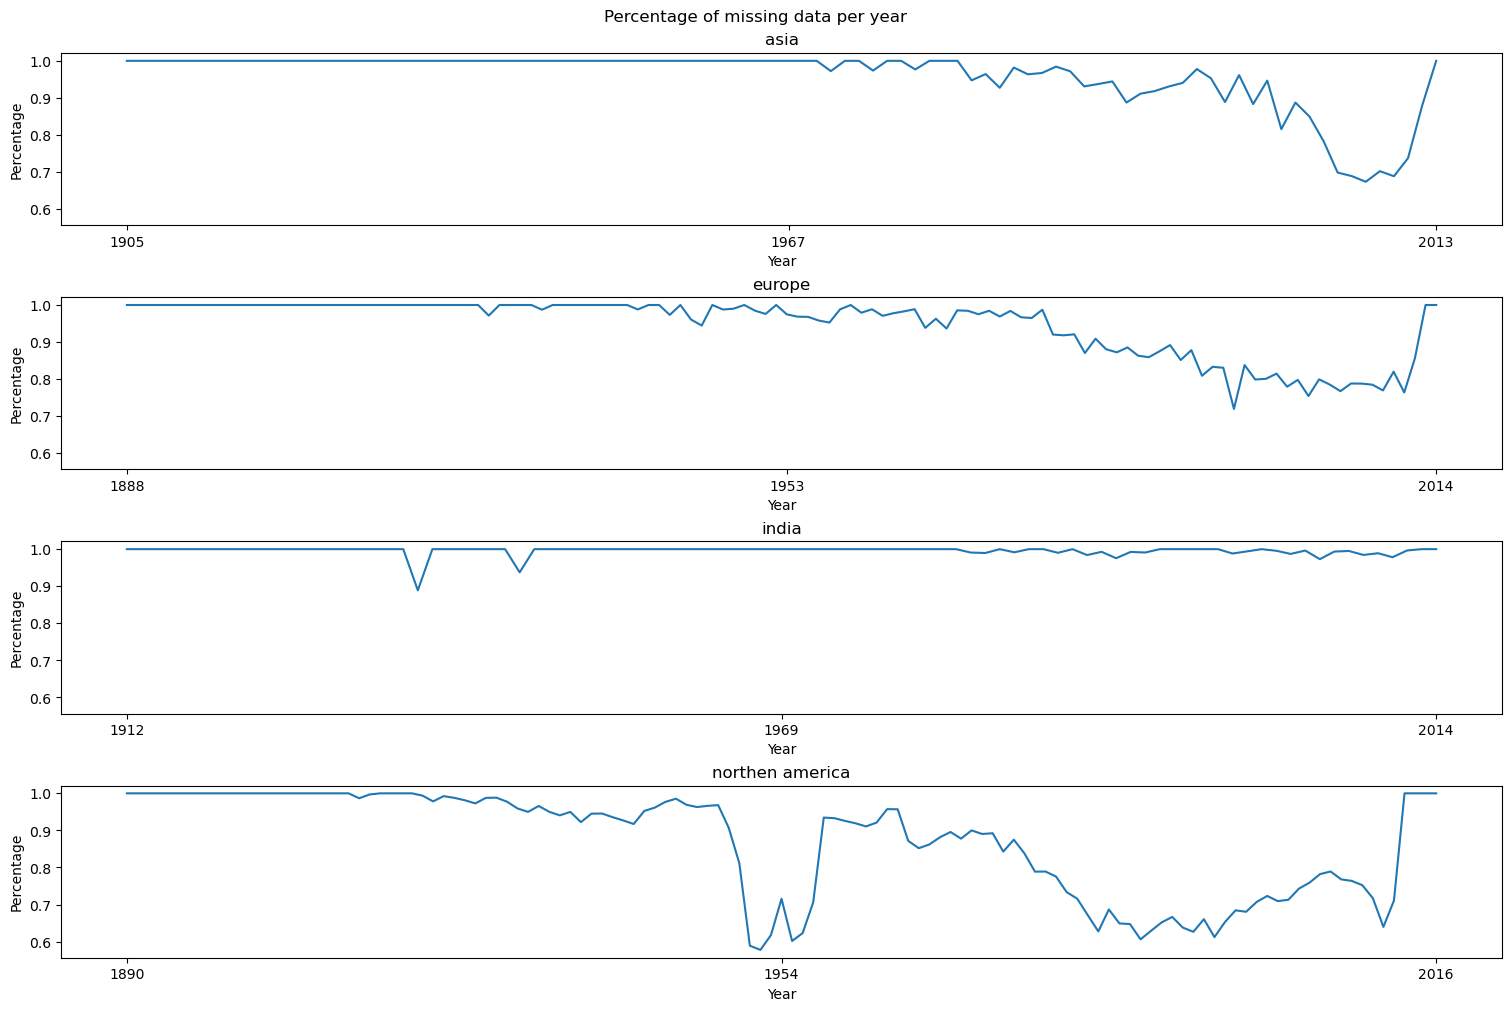

In [231]:
def percentage_missing_data(df, region, ax):
    # Indicator variable showing that something is NA
    df["revenue_is_na"] = df.revenue.isna()

    # % of missing data
    missing_revenue_data = df.groupby("release_year").revenue_is_na.mean()
    
    # Plot it
    ax.plot(missing_revenue_data)
    ax.set(xlabel='Year', ylabel='Percentage')
    ax.set_title(region)
    x_values = ax.get_xticks()
    new_x = [x_values[i] for i in [0, len(x_values) //2, -1]]
    ax.set_xticks(new_x)

fig, axs = plt.subplots(4, sharey=True, figsize=(15, 10), layout='constrained')
fig.suptitle("Percentage of missing data per year")
percentage_missing_data(asia_movies_df, "asia", axs[0])
percentage_missing_data(europe_movies_df, "europe", axs[1])
percentage_missing_data(india_movies_df, "india", axs[2])
percentage_missing_data(northen_america_movies_df, "northen america", axs[3])
plt.show()

### CCDF of revenue

Text(0.5, 1.0, 'CCDF Revenue')

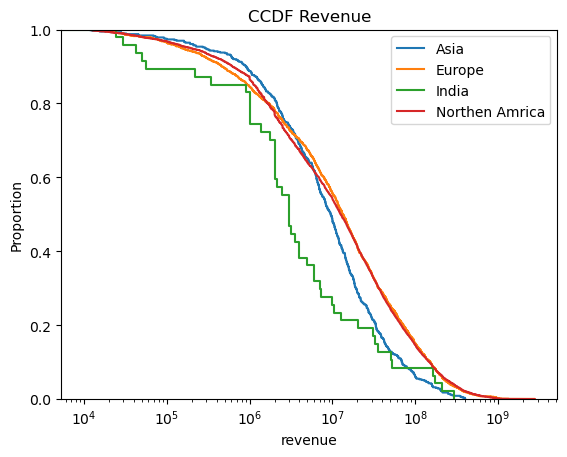

In [236]:
# Creates complementary CDF
sns.ecdfplot(asia_movies_df.revenue, label="Asia", complementary=True)
sns.ecdfplot(europe_movies_df.revenue, label="Europe", complementary=True)
sns.ecdfplot(india_movies_df.revenue, label="India", complementary=True)
sns.ecdfplot(northen_america_movies_df.revenue, label="Northen Amrica", complementary=True)
plt.xscale("log")
plt.legend()
plt.title("CCDF Revenue")

In [ ]:
def plot_ci_revenue:
    revenues = asia_movies_df.revenue.agg(["mean", "sem"])
    revenues["low_ci"] = revenues["mean"] - 1.96 * revenues["sem"]
    revenues["high_ci"] = revenues["mean"] + 1.96 * revenues["sem"]

# shows confidence intervals
display(revenues)

# simple plot
sns.pointplot(x="throws", y="salary", data=df_pitching)
plt.title("tudum");